# Real Estate Valuation (Assumptions of Linear Regression)

Linear Regression is a statistical technique that assesses a linear relationship between response variable and explanatory variables. To use linear regression, the data must meet the below assumptions.

The dataset provides real estate valuations which are collected from Bonston, Massachusetts.

* CRIM: Per capita crime rate by town

* ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

* INDUS: Proportion of non-retail business acres per town.

* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

* NOX: Nitric oxides concentration (parts per 10 million)

* RM: Average number of rooms per dwelling

* AGE: Proportion of owner-occupied units built prior to 1940

* DIS: Weighted distances to five Boston employment centers

* RAD: Index of accessibility to radial highways

* TAX: Full-value property-tax rate per $10,000

* PTRATIO: Pupil-teacher ratio by town
 
* LSTAT    % lower status of the population

* MEDV     Median value of owner-occupied homes in $1000's

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import Imputer,MinMaxScaler
from sklearn.model_selection import cross_val_score

# warning message

import warnings
warnings.filterwarnings("ignore")

In [225]:
data_original = pd.read_csv(r"C:\Users\Dell\Downloads\HousingData.csv")

#Renaming Feature names 
data_original.rename(columns={'CRIM':'Per_capita_crime','ZN':'Proportion_land_zoned','INDUS':'Proportion_non-retail_business','CHAS':'Charles_river'
                     ,'NOX':'NO_concentration','RM':'Average_rooms','AGE':'Proportion_owner_occupied_units','DIS':'Distane_Boston_emp_center','RAD':'Access_to_highways'
                   ,'TAX':'Property_tax','PTRATIO':'Pupil_teacher_ratio','LSTAT':'Lower_status_pop','MEDV':'Median_value_house'},inplace=True)

data_original.head()

,Per_capita_crime,Proportion_land_zoned,Proportion_non-retail_business,Charles_river,NO_concentration,Average_rooms,Proportion_owner_occupied_units,Distane_Boston_emp_center,Access_to_highways,Property_tax,Pupil_teacher_ratio,Lower_status_pop,Median_value_house
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


# Quick Data Description

In [226]:
data_original.describe()

,Per_capita_crime,Proportion_land_zoned,Proportion_non-retail_business,Charles_river,NO_concentration,Average_rooms,Proportion_owner_occupied_units,Distane_Boston_emp_center,Access_to_highways,Property_tax,Pupil_teacher_ratio,Lower_status_pop,Median_value_house
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [227]:
# Creating a Temporary clean dataframe by dropping nan values

df_clean=data_original.dropna()

#  Selecting continuous variables 
continuous_features=df_clean.drop(columns=[col for col in df_clean.columns if len(df_clean[col].unique())<=10],axis=1)

#  Selecting Categorical variables 
categorical_features=df_clean.drop(columns=[col for col in df_clean.columns if len(df_clean[col].unique())>=10],axis=1)

# Missing values in percentage
miss_perc=[data_original.isnull().sum()[i]/data_original.shape[0]*100 for i in range(data_original.shape[1])]
pd.DataFrame({'Missing Values':data_original.isnull().sum(),'In (%)':miss_perc})

,Missing Values,In (%)
Per_capita_crime,20,3.952569
Proportion_land_zoned,20,3.952569
Proportion_non-retail_business,20,3.952569
Charles_river,20,3.952569
NO_concentration,0,0.000000
Average_rooms,0,0.000000
Proportion_owner_occupied_units,20,3.952569
Distane_Boston_emp_center,0,0.000000
Access_to_highways,0,0.000000
Property_tax,0,0.000000


* Six features have missing values, we will impute these during data cleaning.
* For EDA, we will drop the null values.

# Exploratory Data Analysis

# Quantitative variables: Scatter Plot

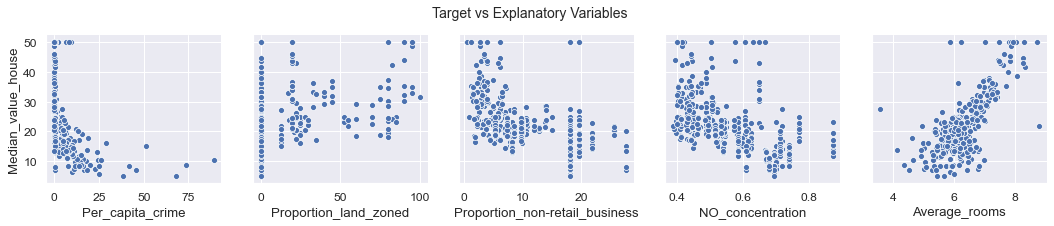

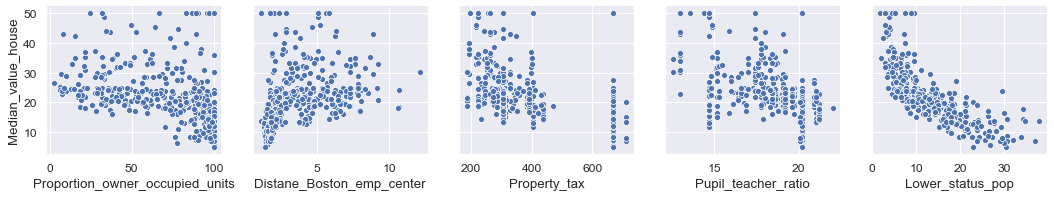

In [228]:
#Number of Columns are "Even" so, n/2 for plotting Top-Bottom graph
n_columns = int(continuous_features.shape[1]/2)
sns.set(font_scale=1.1)
sns.set_style("darkgrid")
ax1 = sns.pairplot(continuous_features,x_vars=continuous_features.iloc[:,0:n_columns].columns,y_vars=['Median_value_house'],height=3)
ax1.fig.suptitle("Target vs Explanatory Variables",y=1.05,size=14)
ax2 = sns.pairplot(continuous_features,x_vars=continuous_features.iloc[:,n_columns:-1].columns,y_vars=['Median_value_house'],height=3)

# Qualitative variables: Bar Plot

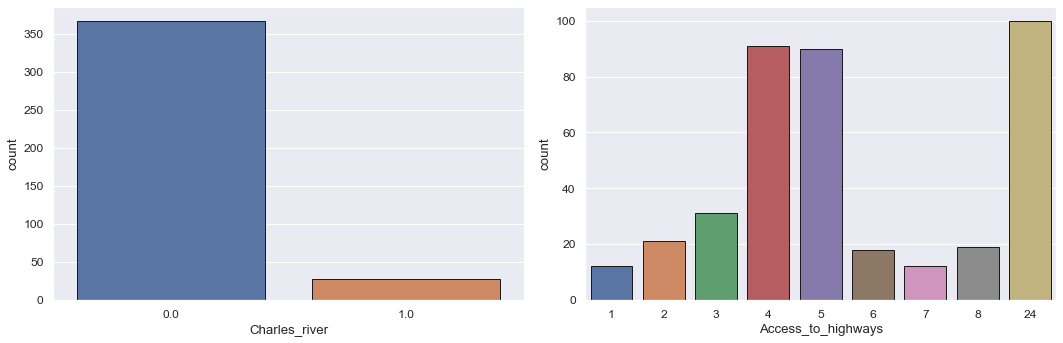

In [229]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.set(font_scale=1.2)
ax1=sns.countplot(categorical_features.iloc[:,0],ax=axes[0],edgecolor='k')
ax2=sns.countplot(categorical_features.iloc[:,1],ax=axes[1],edgecolor='k')
plt.tight_layout()
plt.show()

* Charles river feature is more biased towards 0's than 1's.
* Accessibility to radial highways: Scores (4,5,24) have outnumbered scores (1,2,3,6,7,8) as evident from the countplot. This is an ordinal variable.

# Feature Distribution

In [230]:
# Function for subplots
def Distribution(df,features,rows,cols,plot_type):
    
    fig=plt.figure(figsize=(20,20))
    for index, var in enumerate(features):
        ax=fig.add_subplot(rows,cols,index+1)
        
        if plot_type=='Dist':
            sns.distplot(df[var],ax=ax)
            ax.set_title(var+" Distribution",fontsize=18)
            ax.set_xlabel(var,fontsize=15)
            
        if plot_type=='Box':
            sns.boxplot(df[var],ax=ax)
            ax.set_title(var,fontsize=18)        
            ax.set_xlabel(var,fontsize=15)
    
    fig.tight_layout()

In [231]:
# Distribution of features
pd.DataFrame({'Skewness': continuous_features.skew(),'Kurtosis': continuous_features.kurt()}).sort_values(by='Skewness')

,Skewness,Kurtosis
Pupil_teacher_ratio,-0.884475,-0.139934
Proportion_owner_occupied_units,-0.594880,-0.964970
Proportion_non-retail_business,0.358792,-1.167539
Average_rooms,0.487558,1.832601
Property_tax,0.692876,-1.106102
NO_concentration,0.703377,-0.086430
Lower_status_pop,0.942665,0.541504
Distane_Boston_emp_center,1.032625,0.583327
Median_value_house,1.065946,1.470867
Proportion_land_zoned,2.258275,4.081295


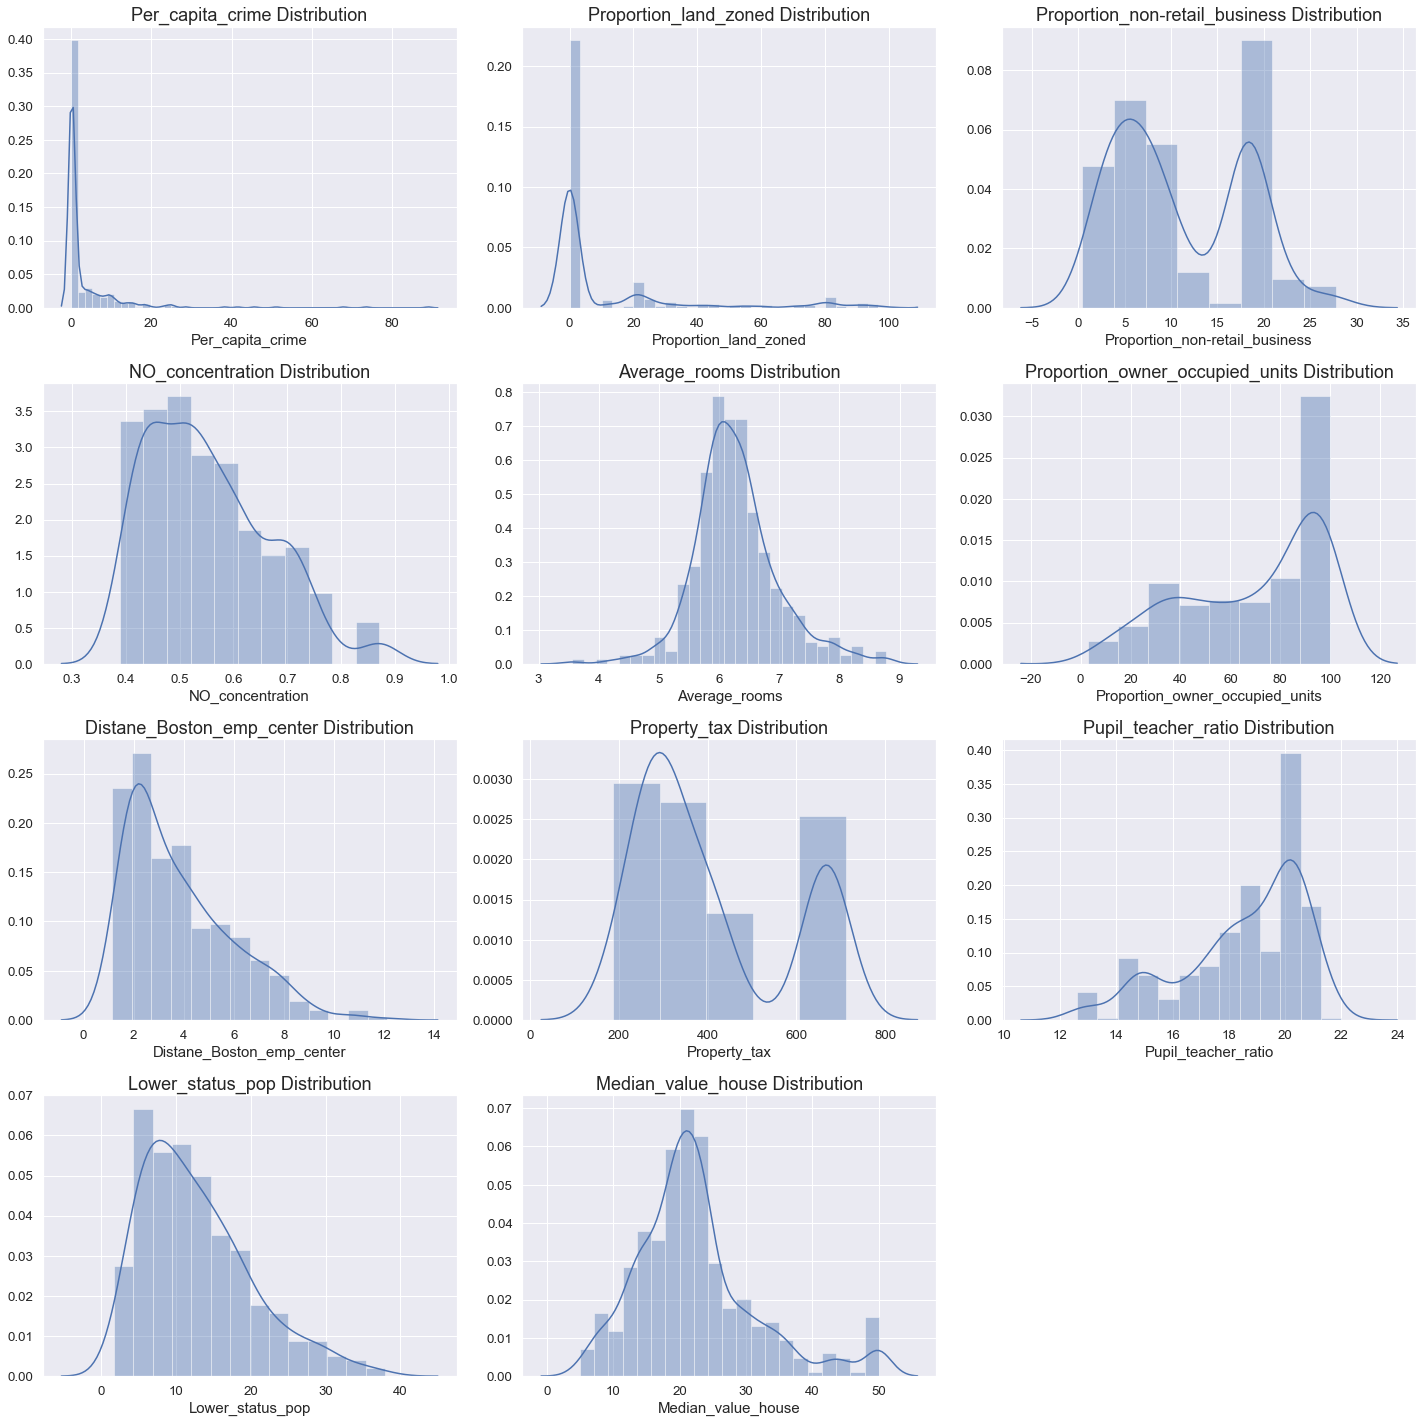

In [232]:
# Distribution plot
# Visualizing feature distribution by calling the function 'Distribution'
Distribution(continuous_features,continuous_features.columns,4,3,'Dist')

* Skewness is the Distortion in the data distribution and Kurtosis represents Tailedness of the distribution. 
* Skewness and Kurtosis are high in Per_capita_crime and Proportion_land_zoned. This maybe due to noisy data and must be transformed before model building. 

# Correlation Analysis

In [233]:
Corr = pd.DataFrame(df_clean.corr()['Median_value_house']).sort_values(by='Median_value_house')
print("\nCorrelation Between Target feature and Independent features:")
Corr


Correlation Between Target feature and Independent features:


,Median_value_house
Lower_status_pop,-0.743450
Pupil_teacher_ratio,-0.543809
Proportion_non-retail_business,-0.510829
Property_tax,-0.508864
NO_concentration,-0.459054
Access_to_highways,-0.416638
Proportion_owner_occupied_units,-0.407470
Per_capita_crime,-0.397230
Charles_river,0.173701
Distane_Boston_emp_center,0.279547


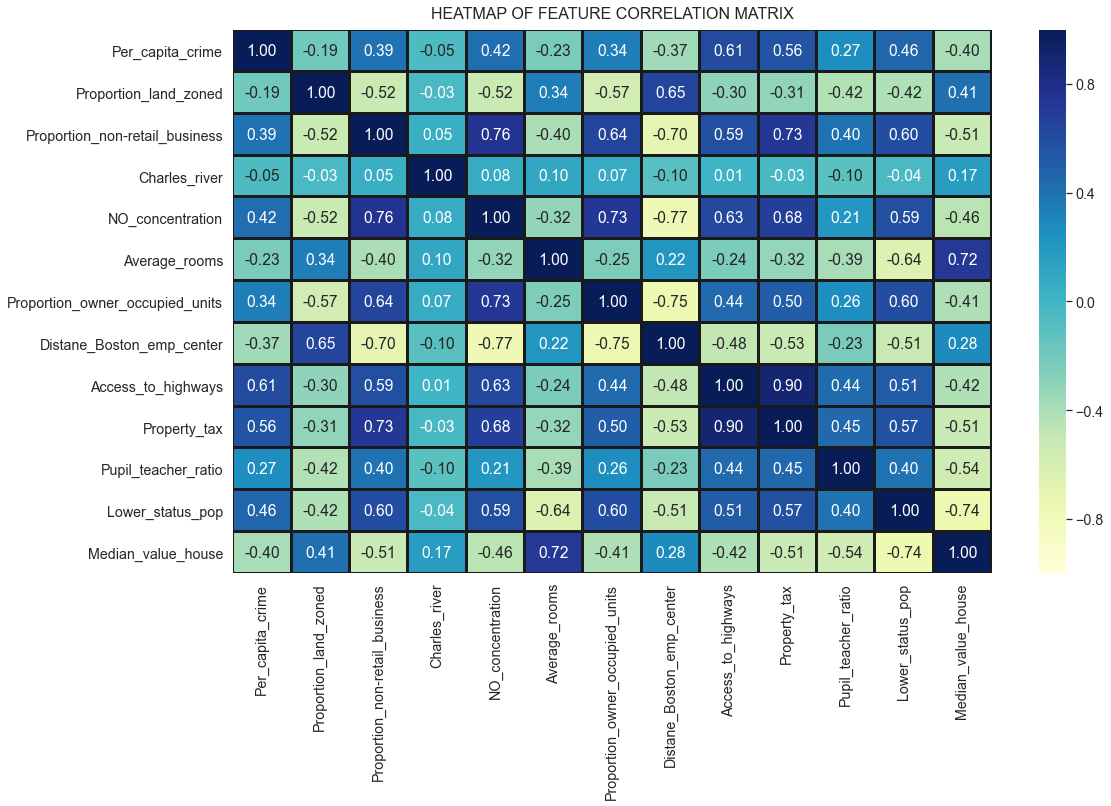

In [234]:
plt.figure(figsize=(17,10))
sns.set(font_scale=1.3)
ax=sns.heatmap(df_clean.corr(),annot=True,vmin=-1,vmax=1,linewidth=2,linecolor='k',fmt='.2f',cmap='YlGnBu')
ax.set_title("Heatmap of Feature Correlation Matrix".upper(),fontsize=16,y=1.01)
plt.show()

* 'Lower_status_pop' has high negative correlation with house price. So, a town with higher percentage of people that belongs to a lower status category would result in lower value of the house in that neighbourhood.
* 'Average_rooms' has high positive correlation with house price. As the number of rooms increases, there is a significant increase in house price.

# Data Cleaning

In [235]:
# cleaning the data with missing values
data_to_clean = data_original.drop(columns=['Charles_river', 'Access_to_highways', 'Per_capita_crime',
 'Proportion_land_zoned'])

imputer = Imputer(missing_values=np.nan,strategy='mean')
data_impute = imputer.fit_transform(data_to_clean)
data = pd.DataFrame(data_impute,columns=data_to_clean.columns)

# Adding back the dropped features
data['Per_capita_crime'] = data_original['Per_capita_crime']
data['Proportion_land_zoned'] = data_original['Proportion_land_zoned']

# Binary variable imputation using frequent values 
data['Charles_river'] = data_original['Charles_river'].fillna(data_original['Charles_river'].mode()[0])

# N-1 dummy variables for feature-"Access_to_highways"
data['Access_to_highways'] = data_original['Access_to_highways']
data=pd.get_dummies(data,columns = ['Access_to_highways'],drop_first=True)

# Remaining nan values in data must be dropped
data.dropna(axis=0,inplace=True)

In [236]:
# Check for Imputed dataframe

pd.DataFrame({'Missing Values':data.isnull().sum()})

,Missing Values
Proportion_non-retail_business,0
NO_concentration,0
Average_rooms,0
Proportion_owner_occupied_units,0
Distane_Boston_emp_center,0
Property_tax,0
Pupil_teacher_ratio,0
Lower_status_pop,0
Median_value_house,0
Per_capita_crime,0


# Handling skewed data

In [237]:
# Performing "Log Transform" on 'Per_capita_crime'

crime_rate = data['Per_capita_crime']
log_crime = np.log(data['Per_capita_crime'])
data['Log_per_capita_crime'] = log_crime
data.drop(columns=['Per_capita_crime'],inplace=True)
print('New Skewness: {}\nPrevious Skewness: {}'.format(log_crime.skew().round(2),crime_rate.skew().round(2)))

New Skewness: 0.4
Previous Skewness: 5.32


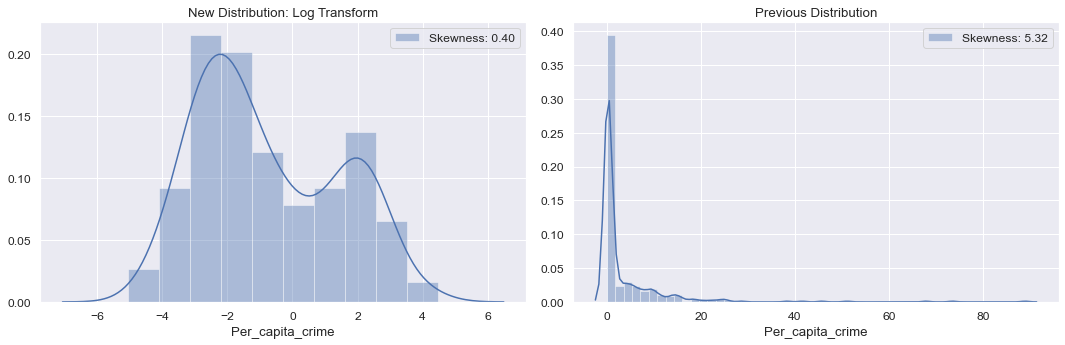

In [238]:
# Distribution of Transformed feature 

sns.set_style("darkgrid")
sns.set(font_scale=1.1)
fig,axes = plt.subplots(1,2,figsize=(15,5))
ax1 = sns.distplot(log_crime,label='Skewness: %.2f' %log_crime.skew(),ax=axes[0])
ax2 = sns.distplot(crime_rate,label='Skewness: %.2f' %crime_rate.skew(),ax=axes[1])
ax1.set_title("New Distribution: Log Transform")
ax2.set_title("Previous Distribution")
plt.tight_layout()
ax1.legend()
ax2.legend()
plt.show()

# Model Building

In [239]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Median_value_house'])
y = data['Median_value_house']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [240]:
model = LinearRegression(fit_intercept=True,normalize=False,n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [241]:
# R-squared for the model
print('R-squared: {}'.format(r2_score(y_pred,y_test).round(2)))

R-squared: 0.66


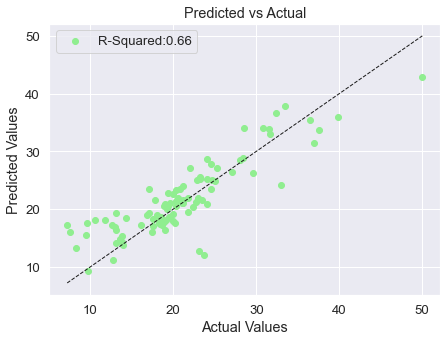

In [242]:
plt.figure(figsize=(7,5))
sns.set(font_scale=1.2)
residual = (y_pred-y_test)
plt.scatter(y_test,y_pred,color='lightgreen',label='R-Squared:%.2f'%r2_score(y_pred,y_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',lw=1,c='k')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc="best")
plt.show()

In [243]:
def model_evaluate(y_predicted,y_true):
    sse = np.sum((y_predicted-y_true)**2)
    mse = (1/data.shape[0])*np.sum((y_predicted-y_true)**2)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_pred,y_test).round(2)
    return pd.DataFrame([sse,mse,rmse,r2],columns=['Calculated Metrics'],index=['SSE','MSE','RMSE','R-Sqd']).round(2)

In [244]:
model_evaluate(y_pred,y_test)

,Calculated Metrics
SSE,1300.21
MSE,2.79
RMSE,1.67
R-Sqd,0.66


Results:

* "Root mean squared error" is 1.67 which is a penalizing metric score.
* "R-Squared" is 0.66 which tells us how much variation in y is explained by variation in x.

# Verifying Assumptions For This Linear Regression

# 1. Linear Relationship

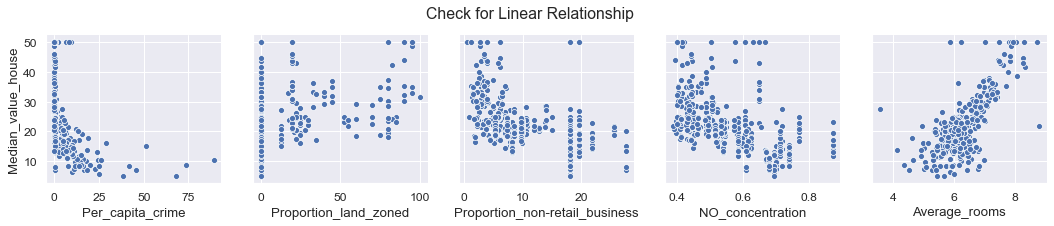

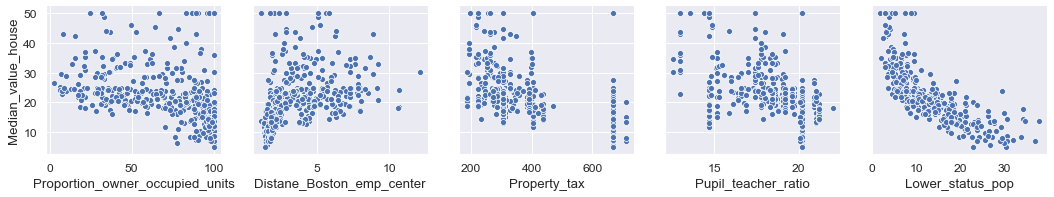

In [245]:
#Number of Columns are "Even" so, n/2 for plotting Top-Bottom graph
n_columns = int(continuous_features.shape[1]/2)
sns.set(font_scale=1.1)
ax1 = sns.pairplot(continuous_features,x_vars=continuous_features.iloc[:,0:n_columns].columns,y_vars=['Median_value_house'],height=3)
ax1.fig.suptitle("Check for Linear Relationship",y=1.05)
ax2 = sns.pairplot(continuous_features,x_vars=continuous_features.iloc[:,n_columns:-1].columns,y_vars=['Median_value_house'],height=3)
plt.grid(False)

* The above plot shows that a linear regression model won't give accurate results as majority of independent variables have non linear relationship with the target i.e. Median_value_house.
* Average_rooms and Lower_status_pop shows a high correlation with the target variable but rest of the variables might affect the linear model.

# 2. Mean of Residuals should be Zero

In [246]:
# Difference between predicted and actual values

Residuals = y_pred - y_test
print('\nMean of Residuals: {}'.format(np.round(Residuals.mean(),2)))


Mean of Residuals: 0.84


* Mean of Residuals = 0.84 is not completely 0 but acceptable being <1.

# 3. Checking for Homoscedasticity

# Plot of Error Terms

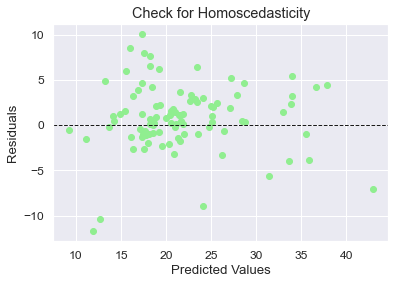

In [247]:
# The residuals should have an equal variance across the predicted regression line.

fig,ax = plt.subplots()
sns.set(font_scale=1.2)
ax.scatter(y_pred,Residuals,c='lightgreen')
ax.axhline([0],linestyle='--',linewidth='1',c='k')
plt.title("Check for Homoscedasticity")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals") 
plt.show()

* The residuals should have an equal variance across the predicted regression line.
* Graph clearly shows that error terms are not homoscedastic. We will also perform a Goldfeld Quandt statistical test to confirm.

# Goldfeld Quandt Test: Checks for Heteroscedasticity

In [248]:
# Arrange the residuals in ascending order.
# Divide the residuals in 2 groups and apply regression on each group.
# You get rss1/df/rss2/df (rss= residual sum of squares, df= degrees of freedom)
# Now using the F-statistics value compare the variance of these groups.

# Necessary dependencies
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# F-statistics and corresponding p-value 
Statistical_values = ['F-statistics','p-value']
Test = sms.het_goldfeldquandt(Residuals,X_test)
results=lzip(Statistical_values,Test)

# Alpha=0.05
if results[1][1]>0.05:
    print("\n| Results - GoldFeld Quandt Test |\n\nNull cannot be rejected: Error terms are Homoscedastic\nP-value: %.4f"%results[1][1])
else:
    print("\n| Results - GoldFeld Quandt Test |\n\nNull is rejected: Error terms are Heteroscedastic\nP-value: %.4f"%results[1][1])


| Results - GoldFeld Quandt Test |

Null is rejected: Error terms are Heteroscedastic
P-value: 0.0032


# 4. Multicollinearity: Correlated Independent features

In [249]:
import  statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add an intercept
x_train = sm.add_constant(X_train)

# Calculate variance inflation factor: 1/1-R^2
vif = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
pd.DataFrame(vif[1:],index=[x_train.iloc[:,1:].columns],columns=['VIF']).round(2)

,VIF
Proportion_non-retail_business,3.85
NO_concentration,4.84
Average_rooms,2.02
Proportion_owner_occupied_units,3.01
Distane_Boston_emp_center,4.24
Property_tax,9.57
Pupil_teacher_ratio,2.31
Lower_status_pop,2.80
Proportion_land_zoned,2.62
Charles_river,1.10


* If VIF is close to 1 then there's no multicollinearity, VIF upto 5 then there's moderate multicollinearity and VIF close to or >10 means high multicollinearity.
* For the linear model above, there is moderate multicollinearity but Property_tax has VIF=9.6 and Access_to_highways_24 has VIF=18 which is considered quite high.
* Square root of VIF tells us how large the standard error would be if the variable was uncorrelated. This can affect results of our statistical tests.
"Property_tax": Standard error would be Sqrt(9.6)=3.09 times as large if it was uncorrelated and "Access_to_highways_24": Standard error would be Sqrt(18)=4.24 times as large if it was uncorrelated.

# 5. Normality Test for Residuals (Error Terms)

# Normal Distribution

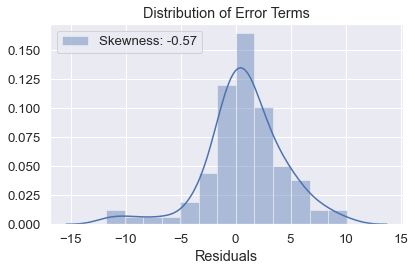

In [250]:
sns.set_style("darkgrid")
sns.set(font_scale=1.2)
sns.distplot(Residuals,label='Skewness: %.2f' %Residuals.skew())
plt.title("Distribution of Error Terms")
plt.xlabel("Residuals")
plt.tight_layout()
plt.legend()
plt.show()

* Residuals follow a Normal distribution with residual mean being close to 0.
* Skewness of  -0.57.

# QQ Plot

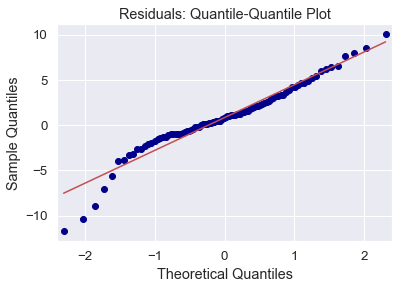

In [251]:
from statsmodels.graphics.gofplots import qqplot

# QQ-plot 
qqplot(Residuals,line='s',c='darkblue')
plt.title("Residuals: Quantile-Quantile Plot")
plt.show()

* This method creates a theoretical sample dataset and divides it into quantiles. The data points are compared and plotted as seen in the graph.
* Points almost follow this straight line in the center but larger error terms must be dealt with.

# Shapiro Wilk Test

In [252]:
from scipy.stats import shapiro

# Calculate Statistic and corresponding p-value
statistic,p_value = shapiro(Residuals)

# Alpha=0.05
if p_value>0.05:
    print("\n| Results - Shapiro Wilk Test |\n\nNull cannot be rejected: Residuals follow a Normal Distribution\nP-value: %.4f"%p_value)
else:
    print("\n| Results - Shapiro Wilk Test |\n\nNull is rejected: Residuals don't follow a Normal Distribution\nP-value: %.4f"%p_value)


| Results - Shapiro Wilk Test |

Null is rejected: Residuals don't follow a Normal Distribution
P-value: 0.0030


# Anderson-Darling Test

In [253]:
from scipy.stats import anderson

# Calculate Statistic and corresponding p-value
statistic_vals = anderson(Residuals)

# Alpha=0.05
# This test generates multiple crtitical and p-values
print("\n| Results - Anderson Darling Test |")
for i,critical in enumerate(statistic_vals.critical_values):
    if statistic_vals.statistic<statistic_vals.critical_values[i]:
        print("\nNull cannot be rejected: Residuals follow a Normal Distribution\nCritical-value: {}\nSignificance_level: {}".format(critical,statistic_vals.significance_level[i]))
    else:
        print("\nNull is rejected: Residuals don't follow a Normal Distribution\nCritical-value: {}\nSignificance_level: {}".format(critical,statistic_vals.significance_level[i]))


| Results - Anderson Darling Test |

Null is rejected: Residuals don't follow a Normal Distribution
Critical-value: 0.554
Significance_level: 15.0

Null is rejected: Residuals don't follow a Normal Distribution
Critical-value: 0.631
Significance_level: 10.0

Null is rejected: Residuals don't follow a Normal Distribution
Critical-value: 0.757
Significance_level: 5.0

Null is rejected: Residuals don't follow a Normal Distribution
Critical-value: 0.883
Significance_level: 2.5

Null is rejected: Residuals don't follow a Normal Distribution
Critical-value: 1.05
Significance_level: 1.0


# 6. Autocorrelation

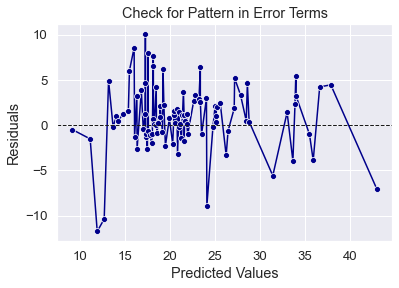

In [254]:
# The residuals should have an equal variance across the predicted regression line.

fig,ax = plt.subplots()
sns.set(font_scale=1.2)
sns.lineplot(y_pred,Residuals,marker='o',color='darkblue')
ax.axhline([0],linestyle='--',linewidth='1',c='k')
plt.title("Check for Pattern in Error Terms")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals") 
plt.show()

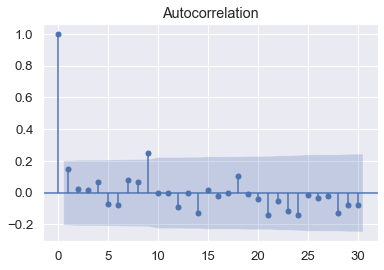

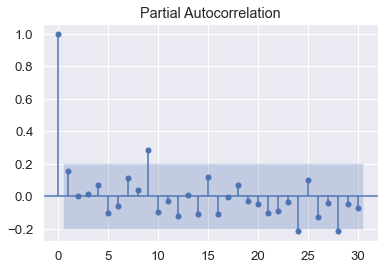

In [255]:
# Autocorrelation
sm.graphics.tsa.plot_acf(Residuals,lags=30)
plt.show()

# Partial Autocorrelation
sm.graphics.tsa.plot_pacf(Residuals,lags=30)
plt.show()

* Minor spikes are visible in the graph. To check for autocorrelation, we can perform a statistical test: Durbin Watson for serial correlation.

# Durbin Watson Test

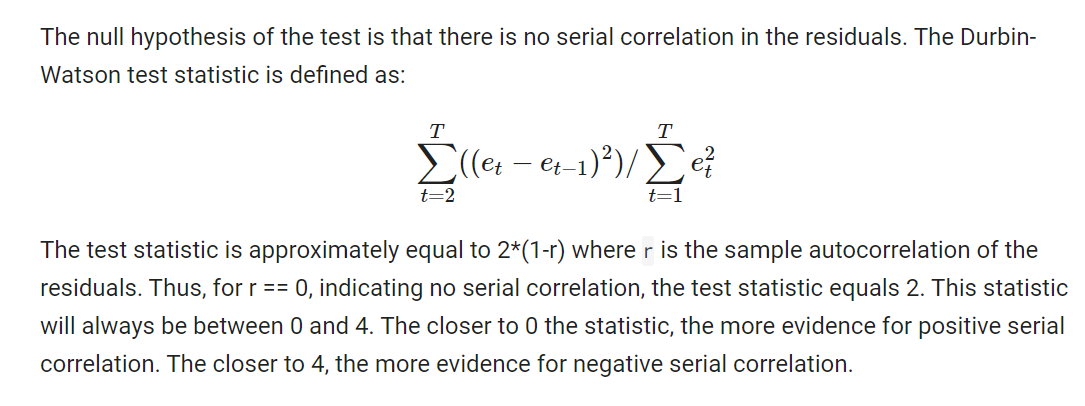

In [256]:
from statsmodels.stats.stattools import durbin_watson

# This test generates statistic value between 0 and 4
print("\n| Results - Durbin Watson Test |")

statistic = durbin_watson(Residuals)

# check for serial correlation
if statistic<2:
    print("\nNull can be rejected: Positive serial correlation exists.\nStatistic: %.2f"%statistic)
elif statistic==2: 
    print("\nNull cannot be rejected: No serial correlation exists.\nStatistic: %.2f"%statistic)
else:
    print("\nNull can be rejected: Negative serial correlation exists.\nStatistic: %.2f "%statistic)


| Results - Durbin Watson Test |

Null can be rejected: Positive serial correlation exists.
Statistic: 1.61


# Conclusion 

In [257]:
# Regression assumptions
assumptions = ['Linear Relationship','Zero mean of residuals','Homoscedasticity','No Multicollinearity','Normal Residual distribution','No Autocorrelation']

# Tests that were used
method = ['Scatter plot between target and response','Statistical: Calculate Residual mean','Residual plot with Goldfeld Quandt test','Heatmap with Variance inflation factor',
        'QQ plot with Shapiro Wilk and Anderson Darling',' ACF and PACF with Durbin Watson test']

# Assumptions are met or violated
outcome=['Violated','Acceptable','Violated','Violated','Violated','Violated']

# Combine the columns together
columns={'Assumptions': assumptions,'Model Outcome': outcome,'Graphical/Statistical method': method}

# Print out the result table
Results= pd.DataFrame(columns,index=np.arange(1,7))
Results

,Assumptions,Model Outcome,Graphical/Statistical method
1,Linear Relationship,Violated,Scatter plot between target and response
2,Zero mean of residuals,Acceptable,Statistical: Calculate Residual mean
3,Homoscedasticity,Violated,Residual plot with Goldfeld Quandt test
4,No Multicollinearity,Violated,Heatmap with Variance inflation factor
5,Normal Residual distribution,Violated,QQ plot with Shapiro Wilk and Anderson Darling
6,No Autocorrelation,Violated,ACF and PACF with Durbin Watson test


Conclusion:

* Linear Regression is not suitable for this dataset. It violates the assumptions and thus can not be used".

Suggestions:

* Polynomial regressor with Ridge regularisation can provide good results and additionally, ridge regularisation can take care of multicollinearity.
* An even better option is to go with "Random Forest Regressor" or "Gradient Boost Regressor" as they are robust to outliers and also are less likely to overfit the model.

> This is a bonafide work of Aarush Gandhi.